# Install and import dependencies

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\dinor/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-11-4 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

# Make Detections

In [12]:
img = 'https://vignette.wikia.nocookie.net/halo/images/5/59/Jefe_maestro_viejo_by_zero.jpg/revision/latest?cb=20120621010052&path-prefix=es'

In [13]:
results = model(img)
results.print()

image 1/1: 463x500 1 person
Speed: 282.9ms pre-process, 62.0ms inference, 2.5ms NMS per image at shape (1, 3, 608, 640)


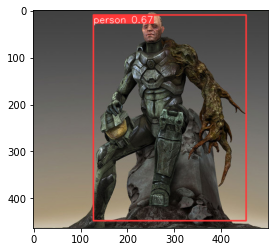

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Real Time Detection

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from Scratch

In [3]:
import uuid   # Unique identifier
import os
import time

In [5]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['happy','sad', 'bored']
number_imgs = 20

In [23]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
#         print(imgname)

In [24]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [4]:
!pip install pyqt5 lxml sip --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Requirement already up-to-date: pyqt5 in z:\anaconda\lib\site-packages (5.15.6)
Requirement already up-to-date: lxml in z:\anaconda\lib\site-packages (4.6.4)
Requirement already up-to-date: sip in z:\anaconda\lib\site-packages (6.4.0)


In [7]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
Plotting labels... 

autoanchor: Analyzing anchors... anchors/target = 5.65, Best Possible Recall (BPR) = 1.0000
Optimizer stripped from runs\train\exp4\weights\last.pt, 14.4MB
Optimizer stripped from runs\train\exp4\weights\best.pt, 14.4MB


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  v6.0-54-gac2c49a torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mos

# Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\dinor/.cache\torch\hub\master.zip
YOLOv5  2021-11-4 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [9]:
img = os.path.join('data', 'images', 'happy.d9d5e9d6-3d6a-11ec-95ba-f83441a5444c.jpg')

In [10]:
results = model(img)

In [11]:
results.print()

image 1/1: 480x640 1 happy
Speed: 49.6ms pre-process, 60.4ms inference, 40.5ms NMS per image at shape (1, 3, 480, 640)


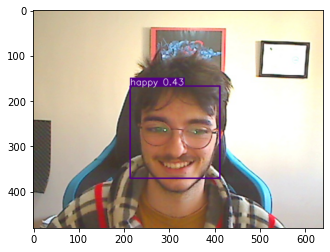

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()